General notes
1. If pre races are considered, how will we model sprint races?
2. While modelling, if we are taking previous years, then time series for example, likelihood that hamilton/verstappen will win have to be modelled with previous years data
3. Pit stop strategy affecting races?

In [ ]:
# Pitstop - lap anomaly

In [ ]:
## Check for active drivers - 857 drivers
## From when data needs to be considered
## Data looks clean in general

## Circuits - geo location, map to date and time of race and get weather updates
## Anomaly - weather changes??

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
# prompt: connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Northwestern/Fall2023-Machine_learning/Project_machine_learning/Formula1

circuits.csv		 constructor_standings.csv  lap_times.csv   races.csv	 sprint_results.csv
constructor_results.csv  drivers.csv		    pit_stops.csv   results.csv  status.csv
constructors.csv	 driver_standings.csv	    qualifying.csv  seasons.csv


In [ ]:
data_directory = ["circuits.csv", "constructor_standings.csv",
             "lap_times.csv",  "races.csv", "sprint_results.csv",
             "constructor_results.csv", "drivers.csv", "pit_stops.csv",
             "results.csv", "status.csv", "constructors.csv", "driver_standings.csv",
             	"qualifying.csv",  "seasons.csv"]

In [ ]:
path = "/content/drive/MyDrive/Northwestern/Fall2023-Machine_learning/Project_machine_learning/Formula1"

## Data check

In [ ]:
for dir in data_directory:
  df = pd.read_csv(f"{path}/{dir}")
  print(f"{dir}: {df.shape}")
  print("Null percentage check : ", sum(df.isna().sum())/ df.shape[0])

circuits.csv: (77, 9)
Null percentage check :  0.0
constructor_standings.csv: (13051, 7)
Null percentage check :  0.0
lap_times.csv: (551742, 6)
Null percentage check :  0.0
races.csv: (1101, 18)
Null percentage check :  0.0
sprint_results.csv: (180, 16)
Null percentage check :  0.0
constructor_results.csv: (12290, 5)
Null percentage check :  0.0
drivers.csv: (857, 9)
Null percentage check :  0.0
pit_stops.csv: (10089, 7)
Null percentage check :  0.0
results.csv: (26080, 18)
Null percentage check :  0.0
status.csv: (139, 2)
Null percentage check :  0.0
constructors.csv: (211, 5)
Null percentage check :  0.0
driver_standings.csv: (34124, 7)
Null percentage check :  0.0
qualifying.csv: (9815, 9)
Null percentage check :  0.05084055017829852
seasons.csv: (74, 2)
Null percentage check :  0.0


In [ ]:
for dir in data_directory:
  print("Checking dataframe ", dir)
  df1 = pd.read_csv(f"{path}/{dir}")
  print(df1.head())

Checking dataframe  circuits.csv
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_

## Geographical location of the circuits (23/77)


In [ ]:
## Date not mentioned, which circuits during which years
## alt??

In [ ]:
df_cir = pd.read_csv(f"{path}/circuits.csv")
df_cir

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [ ]:
print(df_cir[df_cir["country"].duplicated()].sort_values(by = ["country"]).shape)
df_cir[df_cir["country"].duplicated()].sort_values(by = ["country"])

(42, 9)


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
28,29,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.617000,58,http://en.wikipedia.org/wiki/Adelaide_Street_C...
69,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.764700,678,http://en.wikipedia.org/wiki/Red_Bull_Ring
49,50,nivelles,Nivelles-Baulers,Brussels,Belgium,50.6211,4.326940,139,http://en.wikipedia.org/wiki/Nivelles-Baulers
39,40,zolder,Zolder,Heusden-Zolder,Belgium,50.9894,5.256940,36,http://en.wikipedia.org/wiki/Zolder
35,36,jacarepagua,Autódromo Internacional Nelson Piquet,Rio de Janeiro,Brazil,-22.9756,-43.395000,1126,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_In...
47,48,mosport,Mosport International Raceway,Ontario,Canada,44.0481,-78.675600,332,http://en.wikipedia.org/wiki/Mosport
51,52,tremblant,Circuit Mont-Tremblant,Quebec,Canada,46.1877,-74.609900,214,http://en.wikipedia.org/wiki/Circuit_Mont-Trem...
33,34,ricard,Circuit Paul Ricard,Le Castellet,France,43.2506,5.791670,432,http://en.wikipedia.org/wiki/Paul_Ricard_Circuit
50,51,charade,Charade Circuit,Clermont-Ferrand,France,45.7472,3.038890,790,http://en.wikipedia.org/wiki/Charade_Circuit
40,41,dijon,Dijon-Prenois,Dijon,France,47.3625,4.899130,484,http://en.wikipedia.org/wiki/Dijon-Prenois


In [ ]:
df_cir[df_cir["location"].duplicated()].sort_values(by = ["location"]).head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
66,67,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit
59,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.27300,470,http://en.wikipedia.org/wiki/Riverside_Interna...


In [ ]:
df_cir[df_cir["location"] == "Barcelona"]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
48,49,montjuic,Montjuïc,Barcelona,Spain,41.3664,2.15167,79,http://en.wikipedia.org/wiki/Montju%C3%AFc_cir...
66,67,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit


In [ ]:
df_cir[df_cir["location"] == "Barcelona"]["url"]

48    http://en.wikipedia.org/wiki/Montju%C3%AFc_cir...
66       http://en.wikipedia.org/wiki/Pedralbes_Circuit
Name: url, dtype: object

In [ ]:
df_cir["country"].nunique()

35

In [ ]:
df_cir.describe()

,circuitId,lat,lng
count,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683
std,23.001701,22.808866,65.516951
min,1.000000,-37.849700,-118.189000
25%,20.000000,32.777400,-9.394170
50%,40.000000,40.951700,3.930830
75%,59.000000,46.958900,19.248600
max,80.000000,57.265300,144.968000


In [ ]:
df_lap = pd.read_csv(f"{path}/lap_times.csv")
df_lap

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


In [ ]:
df_lap["raceId"].nunique()

510

In [ ]:
df_lap["lap"].describe()

count    551742.000000
mean         29.990193
std          18.420399
min           1.000000
25%          14.000000
50%          29.000000
75%          44.000000
max          87.000000
Name: lap, dtype: float64

## Drivers dataset
### 857 drivers

In [ ]:
# df_drivers = pd.read_csv("drivers.csv")
df_drivers = pd.read_csv(f"{path}/drivers.csv")
df_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [ ]:
df_drivers.isna().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [ ]:
df_drivers.driverId.nunique()

857

In [ ]:
df_drivers.nunique()

driverId       857
driverRef      857
number          45
code            95
forename       476
surname        798
dob            839
nationality     42
url            857
dtype: int64

In [ ]:
# Extract drivers age from data
df_drivers["dob"] = df_drivers["dob"].astype("datetime64")
df_drivers["age"] = df_drivers["dob"].apply(lambda x: datetime.datetime.now().year - x.year)
df_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,42
...,...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,24
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,24
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,28
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,22


In [ ]:
df_drivers["age"].describe()

count    857.000000
mean      82.035006
std       23.702078
min       22.000000
25%       66.000000
50%       86.000000
75%      100.000000
max      127.000000
Name: age, dtype: float64

In [ ]:
df_drivers[df_drivers["age"] == 127]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age
741,741,etancelin,\N,\N,Philippe,Étancelin,1896-12-28,French,http://en.wikipedia.org/wiki/Philippe_%C3%89ta...,127


In [ ]:
# Active or not active??
df_drivers[df_drivers["age"] <= 50]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,42
...,...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,24
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,24
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,28
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,22


## Races

In [ ]:
df_races = pd.read_csv(f"{path}/races.csv")
df_races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [ ]:
df_races["raceId"].nunique()

1101

In [ ]:
df_races.year.describe()

count    1101.000000
mean     1992.020890
std        20.296406
min      1950.000000
25%      1976.000000
50%      1994.000000
75%      2010.000000
max      2023.000000
Name: year, dtype: float64

In [ ]:
df_races.groupby("year")["name"].count()

year
1950     7
1951     8
1952     8
1953     9
1954     9
        ..
2019    21
2020    17
2021    22
2022    22
2023    22
Name: name, Length: 74, dtype: int64

In [ ]:
count_per_year = pd.DataFrame(df_races.groupby("year")["name"].count()).rename(columns = {"name" : "race_count"})
count_per_year["year"] = count_per_year.index
count_per_year = count_per_year.reset_index(drop=True)
count_per_year

,race_count,year
0,7,1950
1,8,1951
2,8,1952
3,9,1953
4,9,1954
...,...,...
69,21,2019
70,17,2020
71,22,2021
72,22,2022


In [ ]:
# Only 2020 is the anomaly
count_per_year[count_per_year["race_count"] != 22].sort_values(by = ["year"]).tail(10)

,race_count,year
61,19,2011
62,20,2012
63,19,2013
64,19,2014
65,19,2015
66,21,2016
67,20,2017
68,21,2018
69,21,2019
70,17,2020


In [ ]:
count_per_year.describe()

,race_count,year
count,74.000000,74.000000
mean,14.878378,1986.500000
std,4.091263,21.505813
min,7.000000,1950.000000
25%,11.000000,1968.250000
50%,16.000000,1986.500000
75%,17.000000,2004.750000
max,22.000000,2023.000000


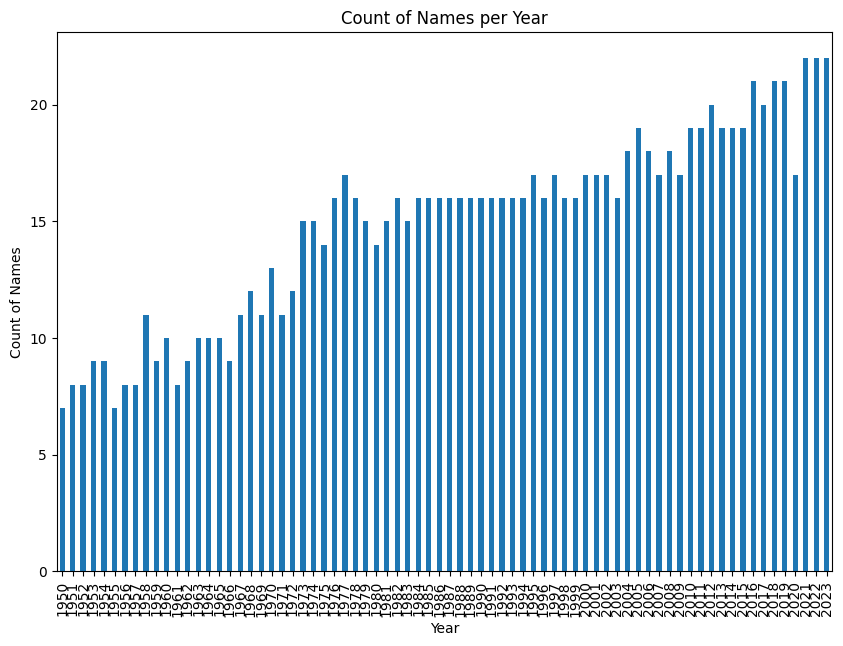

In [ ]:
# Group by 'year' and count the number of 'name' entries per group
count_per_year = df_races.groupby("year")["name"].count()

# Plotting
plt.figure(figsize=(10,7))
count_per_year.plot(kind='bar')

# Adding title and labels
plt.title('Count of Names per Year')
plt.xlabel('Year')
plt.ylabel('Count of Names')

# Display the plot
plt.show()

## Driver standings

In [ ]:
## Map to??
df_driv_stand = pd.read_csv(f"{path}/driver_standings.csv")
df_driv_stand

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


## Lap Times

In [ ]:
df_lap_times = pd.read_csv(f"{path}/lap_times.csv")
df_lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


## Pit stops

In [ ]:
df_ps = pd.read_csv(f"{path}/pit_stops.csv")
df_ps

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


In [ ]:
first_stop = df_ps[df_ps["stop"] == 1]
first_stop["lap"].value_counts()

1     332
13    263
12    256
11    253
10    239
14    230
15    213
16    191
9     186
18    182
17    168
2     165
20    142
8     140
21    139
26    132
7     129
19    121
22     98
24     98
23     97
27     93
25     91
28     88
5      73
29     71
6      69
4      63
31     59
30     57
3      54
34     52
32     50
33     46
35     44
37     37
36     35
39     30
40     24
38     22
41     16
42     11
44      9
45      9
47      8
43      7
50      7
46      7
49      5
48      4
53      3
54      3
56      2
51      2
58      1
64      1
57      1
55      1
Name: lap, dtype: int64

In [ ]:
first_stop["lap"].vaålue_counts()

1     332
13    263
12    256
11    253
10    239
14    230
15    213
16    191
9     186
18    182
17    168
2     165
20    142
8     140
21    139
26    132
7     129
19    121
22     98
24     98
23     97
27     93
25     91
28     88
5      73
29     71
6      69
4      63
31     59
30     57
3      54
34     52
32     50
33     46
35     44
37     37
36     35
39     30
40     24
38     22
41     16
42     11
44      9
45      9
47      8
43      7
50      7
46      7
49      5
48      4
53      3
54      3
56      2
51      2
58      1
64      1
57      1
55      1
Name: lap, dtype: int64

In [ ]:
df_ps[df_ps["stop"] == 6]

,raceId,driverId,stop,lap,time,duration,milliseconds
420,847,18,6,51,16:36:41,23.741,23741
693,851,1,6,56,15:30:48,13.173,13173
2387,884,807,6,53,15:25:37,20.314,20314
4219,936,1,6,54,15:31:15,16.579,16579
4222,936,813,6,58,15:37:12,16.446,16446
5657,970,13,6,48,15:30:29,22.517,22517
5658,970,815,6,49,15:31:25,22.979,22979
6064,982,828,6,31,21:17:01,30.067,30067
6065,982,13,6,37,21:27:05,29.671,29671
6066,982,807,6,38,21:28:16,1:08.357,68357


In [ ]:
df_ps["stop"].min(), df_ps["stop"].max()

(1, 6)

## Merge races and pit stops

In [ ]:
df_race_fil = df_races[["raceId", "year", "name", "date", "time"]].copy()
df_race_fil.shape

(1101, 5)

In [ ]:
# Time column clashing
df_ps_races = df_race_fil.merge(df_ps, on = "raceId", how = "left")
df_ps_races

,raceId,year,name,date,time_x,driverId,stop,lap,time_y,duration,milliseconds
0,1,2009,Australian Grand Prix,2009-03-29,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2009,Malaysian Grand Prix,2009-04-05,09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2009,Chinese Grand Prix,2009-04-19,07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2009,Bahrain Grand Prix,2009-04-26,12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2009,Spanish Grand Prix,2009-05-10,12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10934,1116,2023,United States Grand Prix,2023-10-22,19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
10935,1117,2023,Mexico City Grand Prix,2023-10-29,20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
10936,1118,2023,São Paulo Grand Prix,2023-11-05,17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
10937,1119,2023,Las Vegas Grand Prix,2023-11-19,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_status = pd.read_csv(f"{path}/status.csv")

In [ ]:
df_results = pd.read_csv(f"{path}/results.csv")


In [ ]:
final_df = df_status.merge(df_results, on = "statusId", how = "left")
final_df

,statusId,status,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,1,Finished,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300
1,1,Finished,2.0,18.0,2.0,2.0,3,5.0,2,2,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586
2,1,Finished,3.0,18.0,3.0,3.0,7,7.0,3,3,3.0,6.0,58.0,+8.163,5698779,41,5,1:28.090,216.719
3,1,Finished,4.0,18.0,4.0,4.0,5,11.0,4,4,4.0,5.0,58.0,+17.181,5707797,58,7,1:28.603,215.464
4,1,Finished,5.0,18.0,5.0,1.0,23,3.0,5,5,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26077,139,Illness,24883.0,1043.0,825.0,210.0,20,17.0,\N,R,18.0,0.0,47.0,\N,\N,45,18,1:19.273,222.930
26078,139,Illness,25405.0,1073.0,853.0,210.0,9,20.0,\N,W,20.0,0.0,0.0,\N,\N,\N,0,\N,\N
26079,140,Undertray,25624.0,1084.0,849.0,3.0,6,17.0,\N,R,19.0,0.0,48.0,\N,\N,14,19,1:10.890,219.280
26080,140,Undertray,25645.0,1085.0,852.0,213.0,22,8.0,\N,R,20.0,0.0,17.0,\N,\N,4,20,1:40.216,209.858


In [ ]:
final_df["status"].unique()

array(['Finished', 'Disqualified', 'Accident', 'Collision', 'Engine',
       'Gearbox', 'Transmission', 'Clutch', 'Hydraulics', 'Electrical',
       '+1 Lap', '+2 Laps', '+3 Laps', '+4 Laps', '+5 Laps', '+6 Laps',
       '+7 Laps', '+8 Laps', '+9 Laps', 'Spun off', 'Radiator',
       'Suspension', 'Brakes', 'Differential', 'Overheating',
       'Mechanical', 'Tyre', 'Driver Seat', 'Puncture', 'Driveshaft',
       'Retired', 'Fuel pressure', 'Front wing', 'Water pressure',
       'Refuelling', 'Wheel', 'Throttle', 'Steering', 'Technical',
       'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust',
       'Oil leak', '+11 Laps', 'Wheel rim', 'Water leak', 'Fuel pump',
       'Track rod', '+17 Laps', 'Oil pressure', '+42 Laps', '+13 Laps',
       'Withdrew', '+12 Laps', 'Engine fire', 'Engine misfire',
       '+26 Laps', 'Tyre puncture', 'Out of fuel', 'Wheel nut',
       'Not classified', 'Pneumatics', 'Handling', 'Rear wing', 'Fire',
       'Wheel bearing', 'Physical', 'Fuel sys

In [ ]:
final_df[final_df["status"] == "Finished"]

,statusId,status,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,1,Finished,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300
1,1,Finished,2.0,18.0,2.0,2.0,3,5.0,2,2,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586
2,1,Finished,3.0,18.0,3.0,3.0,7,7.0,3,3,3.0,6.0,58.0,+8.163,5698779,41,5,1:28.090,216.719
3,1,Finished,4.0,18.0,4.0,4.0,5,11.0,4,4,4.0,5.0,58.0,+17.181,5707797,58,7,1:28.603,215.464
4,1,Finished,5.0,18.0,5.0,1.0,23,3.0,5,5,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,1,Finished,26079.0,1110.0,848.0,3.0,23,15.0,14,14,14.0,0.0,44.0,+1:36.184,5046634,35,3,1:49.841,229.553
7242,1,Finished,26080.0,1110.0,825.0,210.0,20,16.0,15,15,15.0,0.0,44.0,+1:41.754,5052204,27,14,1:50.993,227.171
7243,1,Finished,26081.0,1110.0,817.0,213.0,3,19.0,16,16,16.0,0.0,44.0,+1:43.071,5053521,25,15,1:50.994,227.169
7244,1,Finished,26082.0,1110.0,858.0,3.0,2,18.0,17,17,17.0,0.0,44.0,+1:44.476,5054926,37,9,1:50.486,228.213
